In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import *

### Exercise 1
---

Consider an LTI-System described by
$$
\ddot{y} + \frac{1}{10}\dot{y} + y = 2x
$$

(a) Sketch the pole-zero of this system by hand. To this end implement the system in Python using `Transferfunction()` and then transfer it via `to_zpk()`.

(b) By hand sketch and via python simluate the impulse response.

(c) By hand sketch and via python simluate the step response.

(d) By hand sketch and via python cacluate the frequency response.

(e) Simulate the systems respone $y(t)$ due to the input 
(use `lsim()`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html)
$$
x(t) = \left(2+e^{-\frac{1}{10}t}\right)H(t)
$$
where $H(t)$ denotes the Heaviside/step-function.

(f) Compare your simualated result $y_s(t)$ to the analytcial function $y_a(t)$. To this end transform the differential equation in the $s$-domain, solve for $Y(s)$ and use https://www.wolframalpha.com/ to find the inverse Laplace transform. Hint: The code below provides $y_a(t)$.

### Solution 1

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-0.05+0.99874922j, -0.05-0.99874922j]),
2.0,
dt: None
)


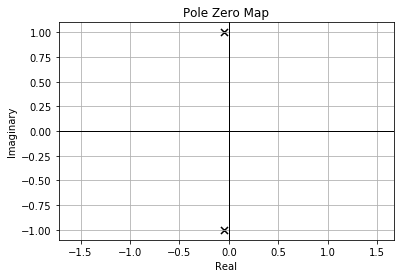

In [2]:
################
# Your code here
################

# (a) Set up the system
sys = TransferFunction([2],[1,1/10,1])
print(sys.to_zpk())
# Instead of sketching the zp-map by hand I use here the control library
import control as c
sys_map = c.tf([2],[1,1/10,1])
c.pzmap(sys_map)
plt.grid()

(b) and (c): The impulse $h(t)$ and the step response $s(t)$ are given by

Text(0.5, 1.0, 'Step Response')

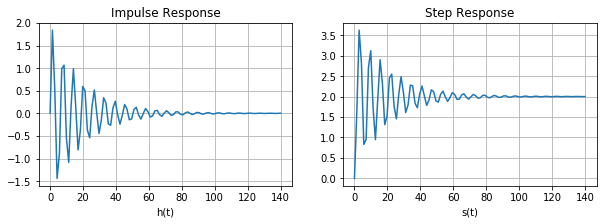

In [3]:
t, h = sys.impulse()
t, s = sys.step()
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(t,h)
plt.grid()
plt.xlabel('t')
plt.xlabel('h(t)')
plt.title('Impulse Response')
plt.subplot(1,2,2)
plt.plot(t,s)
plt.grid()
plt.xlabel('t')
plt.xlabel('s(t)')
plt.title('Step Response')

(d) For the frequency response we obtain:

Text(0.5, 1.0, 'Phase')

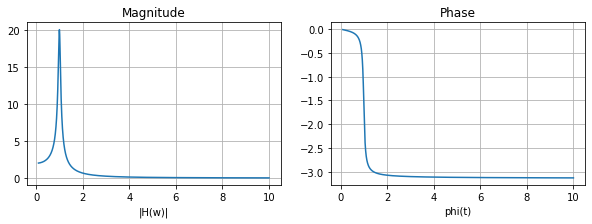

In [4]:
w, H = sys.freqresp()
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(w,np.abs(H))
plt.grid()
plt.xlabel('w')
plt.xlabel('|H(w)|')
plt.title('Magnitude')
plt.subplot(1,2,2)
plt.plot(w,np.angle(H))
plt.grid()
plt.xlabel('w')
plt.xlabel('phi(t)')
plt.title('Phase')

(e) We simulate the systems response:

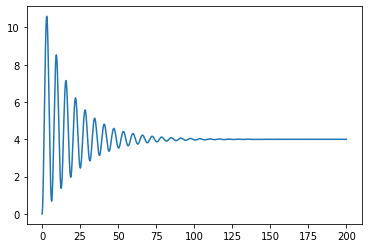

In [5]:
t = np.linspace(0,200,10000)
x = 2+np.exp(-1/10*t)
t,y,x = lsim(sys,x,t)
plt.plot(t,y)

(f) Transforming the differential equation with the given input into the $s$-domain yields:
$$
Y(s) = \frac{2}{s^2+\frac{1}{10}s+1}
\left(\frac{2}{s}+\frac{1}{s+\frac{1}{10}}\right)
$$
Calculating the inverse Laplace Transform using wolframalpha: 

https://www.wolframalpha.com/input?i=Inverse+Laplace+Transform+2%2F%28s%5E2%2B1%2F10*s%2B1%29*%282%2Fs%2B1%2F%28s%2B1%2F10%29%29

yields the analytical solution given below.

In [6]:
def y_a(t):
    return 2*(2 + np.exp(-t/10) - (np.exp(-t/20)*(3*np.sqrt(399)*np.cos((np.sqrt(399)*t)/20) + np.sin((np.sqrt(399)*t)/20)))/np.sqrt(399))

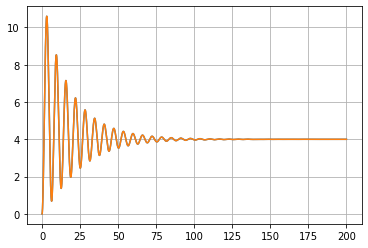

In [7]:
# Compare this analytical solution the one above
plt.plot(t,y)
plt.plot(t,y_a(t))
plt.grid()

### Exercise 2
---
Consider an LTI-system, which has one single $p_1=-2$ and a single zero $z_1=0$ (the gain is $K=3$). 

(a) Sketch the pole-zero map of this system.

(b) What is the corresponding differential equation in the time domain?

(c) Sketch the step response qualitatively.

(d) Calculate the step response analytically and compare it to the `scipy.signal`solution.

(e) Sketch and calculate the Bode plot.

### Solution 2

(a) We have
$$
H(s) = 3\frac{s}{s+2}
$$
and hence we obtain:

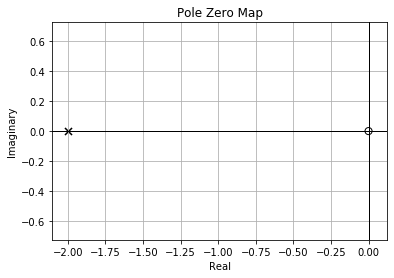

In [8]:
sys_map = c.tf([3,0],[1,2])
c.pzmap(sys_map)
plt.grid()

(b) We obtain:
$$
\dot{y}(t) + 2y(t) = 3\dot{x}(t)
$$

(c) and (d): To find the step response $s(t)$ we set $x(t)=1$ and transform in the Laplace domain:
$$
S(s) = \frac{3}{s+2}
$$
and hence we get
$$
s(t) = 3e^{-2t}
$$

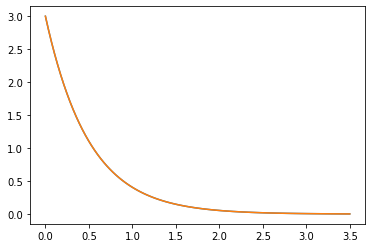

In [9]:
sys = ZerosPolesGain([0],[-2],3)
t,s = sys.step()
plt.plot(t,s)
plt.plot(t,3*np.exp(-2*t))

Text(0.5, 1.0, 'Phase')

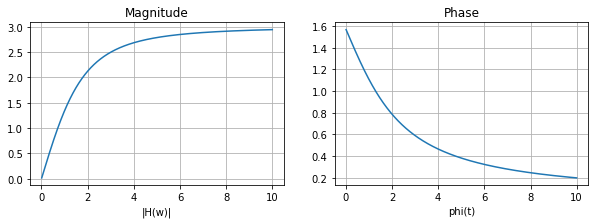

In [10]:
################
# Your code here
################

w, H = sys.freqresp()
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(w,np.abs(H))
plt.grid()
plt.xlabel('w')
plt.xlabel('|H(w)|')
plt.title('Magnitude')
plt.subplot(1,2,2)
plt.plot(w,np.angle(H))
plt.grid()
plt.xlabel('w')
plt.xlabel('phi(t)')
plt.title('Phase')

### Exercise 3

Calculate the $z$-Transform $F(z)$ of 
$$
f[n] = f_n = a^{n},\qquad a\in\mathbb{C},\,|a|<1
$$
Use
$$
\sum_{n=0}^{\infty} q^n = \frac{1}{1-q},\qquad |q|<1
$$
This last equation is a geometric series (https://en.wikipedia.org/wiki/Geometric_series).

### Solution 3

We obtain
$$
\sum_{n=0}^{\infty} \left(\frac{a}{z}\right)^n = \frac{1}{1-\frac{a}{z}} = \frac{z}{z-a}
$$